# Import packages

In [2]:
# Import pandas, pyplot from matplotlib, and seaborn.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

# Load the dataset

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 


data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

data.head(10)

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
5,29.0,9.614382,1.027163,105.889148
6,55.0,24.893811,4.273602,198.679825
7,31.0,17.355042,2.289855,108.733932
8,76.0,24.648898,7.130116,270.189400
9,13.0,0.431128,2.229423,48.280582


# Data exploration

In [5]:
# Display the shape of the data as a tuple (rows, columns).
data.shape

(4572, 4)

In [6]:
# Generate descriptive statistics about TV, Radio, and Social_Media.


data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


# Explore the dependent variable

In [9]:
# Calculate the average missing rate in the sales column.
missing_sales = data.Sales.isna().mean()

In [10]:
# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places.
missing_sales = round(missing_sales*100, 2)

In [11]:
# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' +  str(missing_sales) + '%')

Percentage of promotions missing Sales: 0.13%


# Remove the missing data

In [12]:
# Subset the data to include rows where Sales is present.

data = data.dropna(subset = ['Sales'], axis = 0)

# Visualize the sales distribution

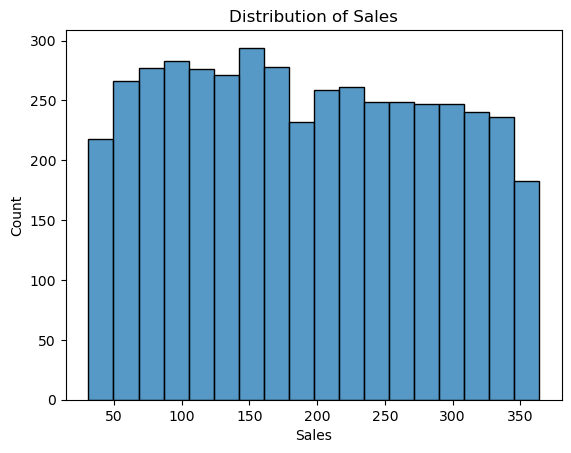

In [7]:
# Create a histogram of the Sales.
fig = sns.histplot(data['Sales'])

# Add a title
fig.set_title('Distribution of Sales');

# Model building

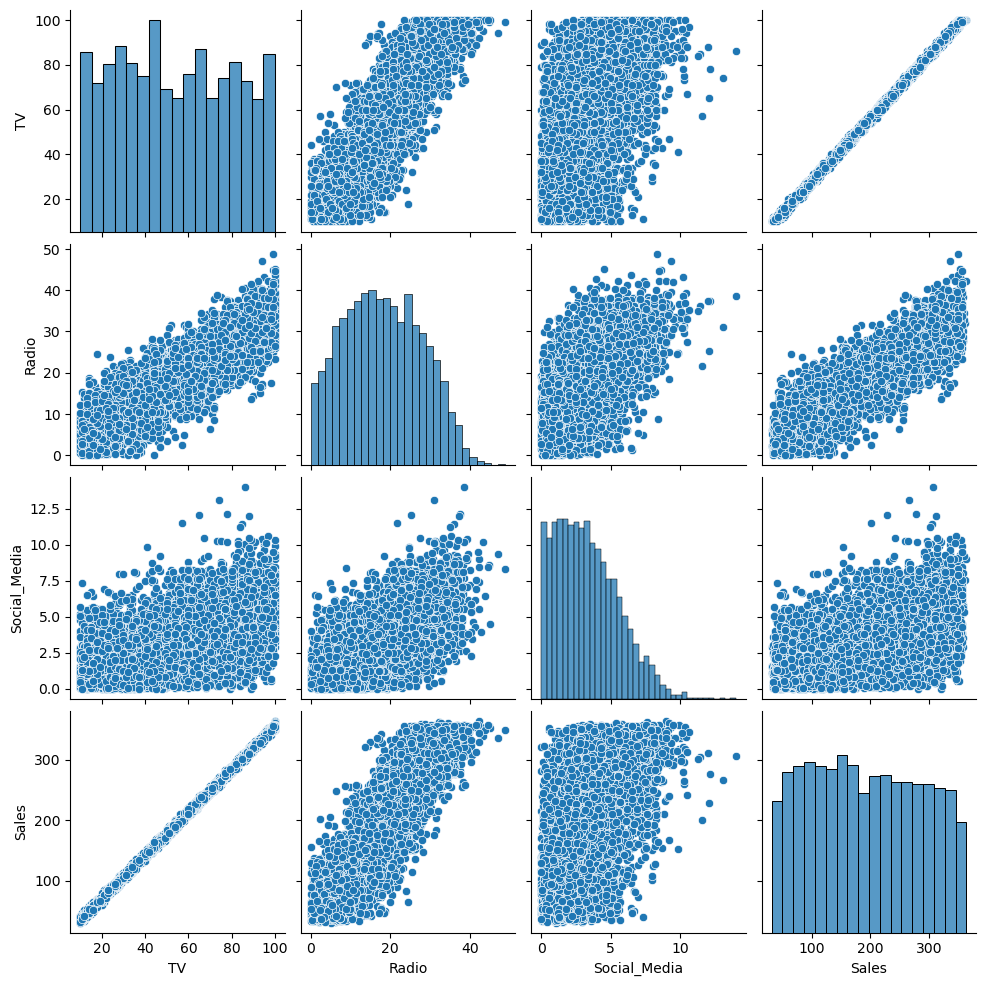

In [14]:
# Create a pairplot of the data.
sns.pairplot(data);

# Build and fit the model

In [15]:
# Define the OLS formula.
ols_formula = 'Sales ~ TV'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:14:46   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check model assumptions

# Linearity

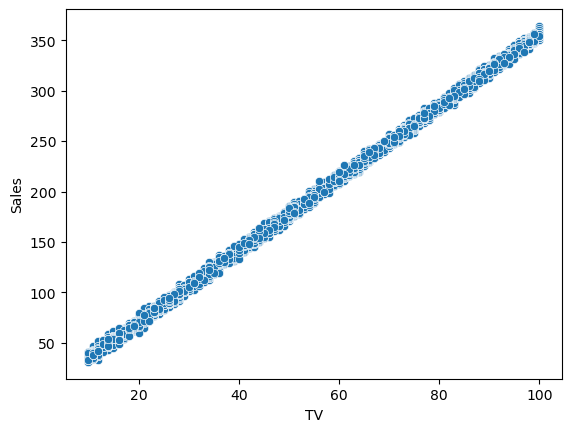

In [16]:
# Create a scatterplot comparing X and Sales (Y).

sns.scatterplot(x = data['TV'], y = data['Sales']);

# Independence

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.


# Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

Plot 1: Histogram of the residuals
Plot 2: Q-Q plot of the residuals

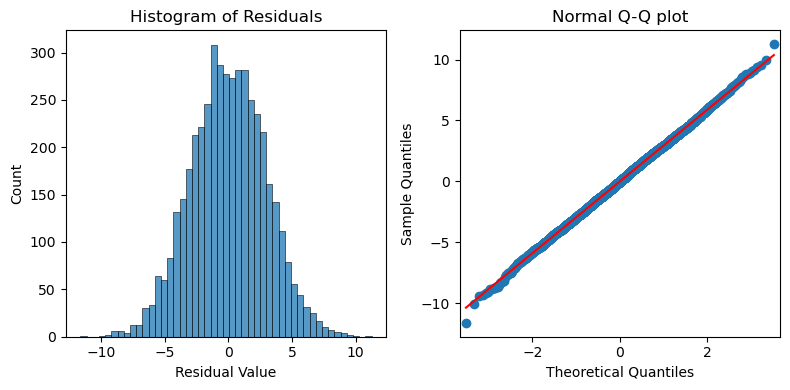

In [20]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()


# Homoscedasticity

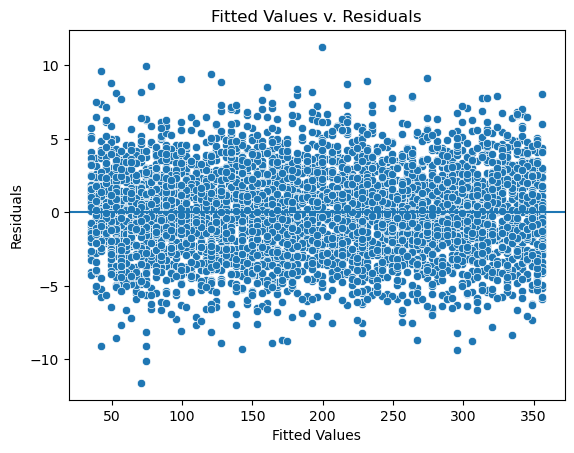

In [21]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot.
plt.show()

# Results and evaluation

Display the OLS regression results
If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [22]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:14:46   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question: The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?

Using TV as X results in a simple linear regression model with  𝑅2=0.999
 . In other words, TV explains  99.9%
  of the variation in Sales.

The R-squared value will depend on the variable selected for X.

# Interpret the model results

Question: Based on the preceding model results, what do you observe about the coefficients?

When TV is used as the independent variable X, the coefficient for the Intercept is -0.1263 and the coefficient for TV is 3.5614.





Question: How would you write the relationship between X and Sales in the form of a linear equation?

When TV is used as the independent variable X, the linear equation is:

𝑌=Intercept+Slope∗𝑋
Sales (in millions)=Intercept+Slope∗TV (in millions)
Sales (in millions)=−0.1263+3.5614∗TV (in millions)
Question: Based on this model, what is your interpretation of the relationship between X and Sales?

According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

Question: Why is it important to interpret the beta coefficients?

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

Among TV, social media, and radio, TV had the strongest positive linear relationship with sales.
The linear regression model estimates that 99.9% of the variation in sales is explained by the TV promotional budget. In other words, nearly all of the variation in sales can be explained by the TV promotional budget alone, making TV an excellent predictor of sales.
According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget would result in an estimated 3.5614 million more dollars in sales.
The interval (3.558 million, 3.565 million) has a 95% probability of containing the true estimate of the increase in sales for a one million dollar increase in the TV promotional budget. Therefore, the estimate provided in the previous bullet is very confident.

Question: Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

When TV is used as the independent variable, it has a p-value of 0.000
 and a 95%
 confidence interval of [3.558,3.565]
. This means there is a 95%
 chance the interval [3.558,3.565]
 contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact TV has on Sales.

Question: Based on this model, what are you interested in exploring?

Potential areas to explore include:

Providing the business with the estimated sales given different TV promotional budgets
Using both TV and Radio as independent variables
Adding plots to help convey the results, such as using the seaborn regplot() to plot the data with a best fit regression line
Question: What recommendations would you make to the leadership at your organization?

Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small. Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales.